In [1]:
from skimage import color,io,filters,morphology,util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack as fp

# Soal 1.

#### Noise Removal
<p>Diberikan sebuah citra xray bernama noisy_xray.png. Sayangnya citra ini memiliki noise
berupa bintik-bintik putih yang mengganggu di hasil x-ray.</p>

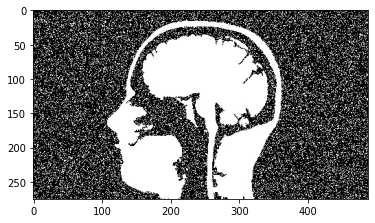

In [2]:
xray = io.imread('noisy_xray.jpg')
plt.imshow(xray,cmap='gray')
plt.show()

### a.  Bersihkan noise pada gambar di atas menggunakan morphology operator!

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


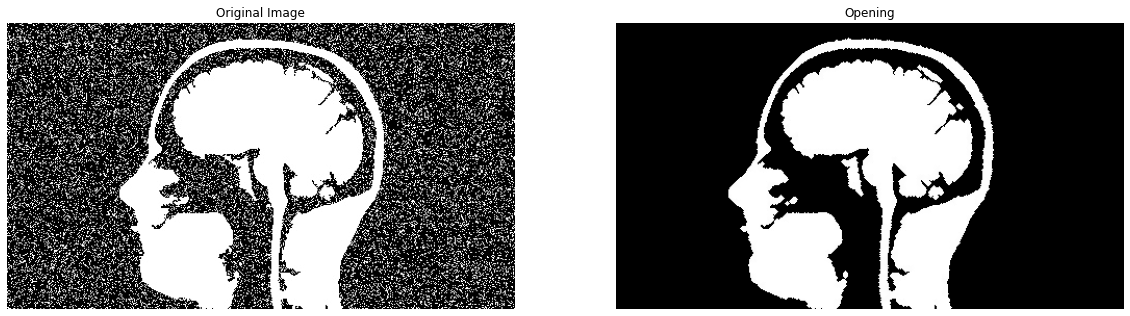

In [3]:
from skimage import io, color
from skimage.util import img_as_ubyte
from skimage.morphology import disk, white_tophat,closing,opening,dilation,erosion
import matplotlib.pyplot as plt


# Change image to RGB
xray = color.rgb2gray(xray)

se = disk(2)
op= opening(xray, se)


# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(xray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Opening')
plt.imshow(op, cmap='gray')
plt.axis('off')
plt.show()

### b. Ceritakan mengapa Anda mengerjakan poin a dengan cara tersebut!

Opening melakukan proses erosi dulu lalu dilatasi. Karena pada gambar original, untuk menghilangan noise yang berupa titik2 putih dan detail2 yang kecil maka kita perlu melakukan proses erosi terlebih dahulu untuk menghilangkan detail-detail kecil tersebut. Lalu, setelah menghilangkan detail-detail kecil tersbut ,  proses erosi menyebabkan beberapa bagian terkikis maka diperlukan proses dilatasi untuk menambahkan bagian2 yang terkikis karena erosi. Untuk bagian detail-detail yang kecil waktu proses erosi menyebabkan bagian tersebut hilang sehingga waktu proses dilatasi tidak menambah apa2. Oleh karena itu, proses opening merupakan cara yang tepat untuk menghilangkan noise gambar xray dengan detail-detail yang kecil

### c. Sebelumnya Anda pernah melakukan noise removal dengan menggunakan median dan mean filter di lab 1. Jabarkan bagaimana perbedaan pada hasilnya jika dibandingkan dengan noise removal di lab 4 ini?

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.
c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


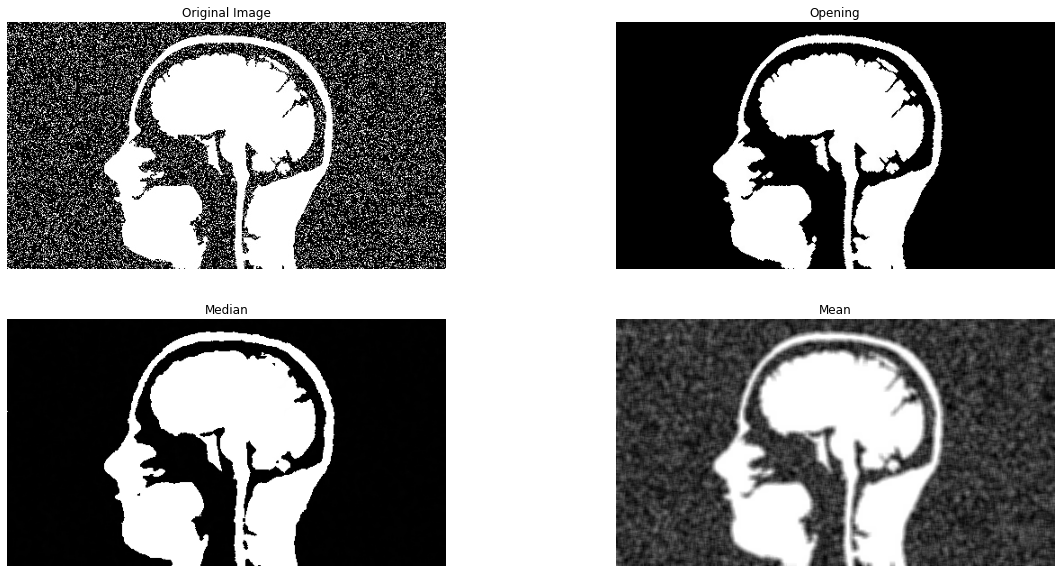

In [4]:
xray2 = color.rgb2gray(xray)
noise = util.img_as_ubyte(util.random_noise(xray2,mode='s&p', salt_vs_pepper=0.02))
fi = filters.rank.median(noise, selem=morphology.square(6))

xray3 = color.rgb2gray(xray)
fi2 = filters.rank.mean(xray3,selem=morphology.square(6))


# Show image
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(xray, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Opening')
plt.imshow(op, cmap='gray')
plt.axis('off')


plt.subplot(2,2,3)
plt.imshow(fi,cmap='gray')
plt.title('Median'); 
plt.axis("off")


plt.subplot(2,2,4)
plt.imshow(fi2,cmap='gray')
plt.title('Mean'); 
plt.axis("off")

plt.show()

Bisa dilihat dari hasil perbandingan output diatas bahwa dibandingkan dengan menggunakan filter dengan median dan mean, proses noise removal  menggunakan morphology operator lebih baik dengan detail-kecil shape nya dari citra asli masih terlihat jelas. 

# Soal 2

### Pesan rahasia
<p>Anda mendapat pesan rahasia yang terdiri dari dua citra. Untuk dapat membaca pesan ini, Anda
harus menerapkan morphological image processing pada masing-masing citra, kemudian
menggabungkannya menjadi satu. Berikut petunjuknya.</p>

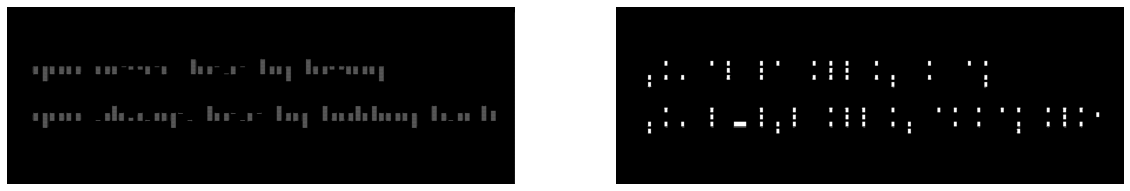

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
misteri1 = io.imread('misteri1.jpg')
plt.axis('off')
plt.imshow(misteri1,cmap='gray')


plt.subplot(1,2,2)
misteri2 = io.imread('misteri2.jpg')
plt.imshow(misteri2,cmap='gray')
plt.axis('off')
plt.show()

### a. Lakukan dilatasi terhadap citra misteri1.jpg dan misteri2.jpg dengan kernel yang tepat. Hanya ada satu pasang kernel yang benar untuk membuka pesan rahasia. Berikut adalah pilihan kernel yang bisa Anda coba:
<li>{diamond(25), diamond(17)}</li>
<li>{rectangle(12, 25), rectangle(20, 10)}</li>
<li>{rectangle(46, 1), rectangle(1, 44)}</li>
<li>{disk(13), disk(19)}</li>


c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.
c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


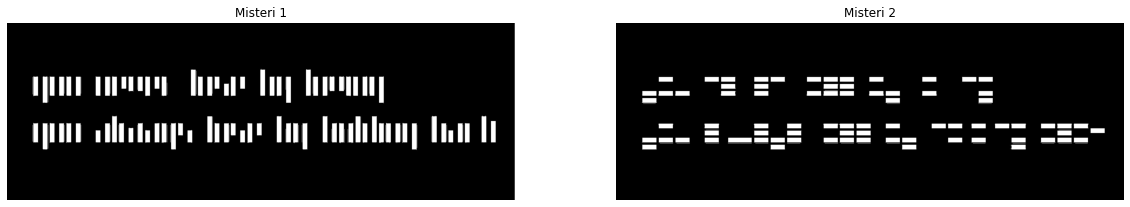

In [6]:
from skimage.morphology import disk,diamond,rectangle

# Change image to RGB
misteri1 = color.rgb2gray(misteri1)
misteri2 = color.rgb2gray(misteri2)

kn1 = rectangle(46, 1)
kn2 = rectangle(1, 44)
dlt1= dilation(misteri1, kn1)
dlt2= dilation(misteri2, kn2)


# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Misteri 1')
plt.imshow(dlt1, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Misteri 2')
plt.imshow(dlt2, cmap='gray')
plt.axis('off')
plt.show()

### b. Gabungkan kedua citra hasil dilatasi poin a! Jika kernel yang Anda pilih benar, pesan rahasia akan terlihat.


(-0.5, 1946.5, 678.5, -0.5)

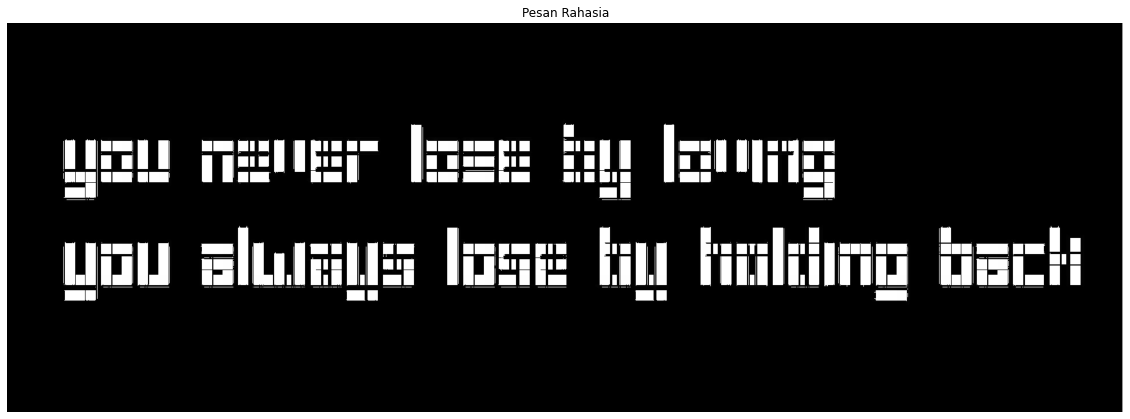

In [7]:
merge = dlt1 + dlt2

# Show image
plt.figure(figsize=(20,10))
plt.title('Pesan Rahasia')
plt.imshow(merge, cmap='gray')
plt.axis('off')

### c.Tuliskan pesan rahasia yang Anda dapatkan!


<p>you never lose by loving</p>
<p>you always lose by holding back</p>